# Practical: Data Analysis

In this assignment you will experiment with

- exploring the data collected at a home and a weather station around the Eindhoven area,
- building a predictive model for estimating the amount of electricity produced by the solar panels at the home given a weather forecast.

This notebook will guide you through the typical steps that such work would involve. It demonstrates how to explore and clean the data, and how to use it to train predictive models.

#### Goal

Your task is to train a model on the time series data containing:

- measurements of the amount of electricity produced by the solar panels on the roof of a home in the Eindhoven area
- weather measurements around the Eindhoven airport

in order to predict the hourly solar panel output given the weather forecast for a particular hour of a particular day.

#### Jupyter notebooks

For those who are new to jupyter notebooks, a typical notebook contains text cells (like this one) interleaved with code cells (the gray boxes). You can execute a cell by selecting it and pressing Shift+Enter. The expression in the last line in a cell is the output of that cell. Try executing the following cell.

In [1]:
def add(a, b):
    return a + b

add(1,2)

3

You can find out more about jupyter notbooks at:

- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/
- http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb
- http://nbviewer.jupyter.org/github/jupyter/notebook/tree/master/docs/source/examples/Notebook/

#### References

The "Python Data Scinence Handbook" provides a good overview of using python for data data analysis and you are encouraged to consult it during this assignment:

- https://jakevdp.github.io/PythonDataScienceHandbook/

The "Introduction to Statistical Learning" [ISLR] (7th edition) book provides a good introduction to machine learning from the statistical perspective:

- http://faculty.marshall.usc.edu/gareth-james/ISL/

The "Dataset Shift in Machine Learning" book by Joaquin Quiñonero-Candela, Masashi Sugiyama, Anton Schwaighofer and Neil D. Lawrence provides a good overview of the problems that may arise when the test and training inputs and outputs have different distributions. You can find more information about the book at:

- https://mitpress.mit.edu/books/dataset-shift-machine-learning

#### Deliverable

Throughout this notebook you will find cells starting with `#TODO` and `#BEGIN_TODO`. Fill in all these TODO cells. The `#TODO` cells are meant to guide you, while the `#BEGIN_TODO` _answer cells_ will be graded.

- Answer cells start and end with tags, `# // BEGIN_TODO [Q0]` and `# // END_TODO [Q0]`, for example. Do not edit these tags in any way, else your answers may not be parsed by our grading system. 
- Your answers should be provided in Python code format between the tag lines, for example:
```
# // BEGIN_TODO [Q0]
q0 = 1
# // END_TODO [Q0]
```
- Do not place any other code between the tags, unless explicitly requested.
- Do not reuse the variable names from the answer cells that you are supposed to use to fill in answers, so in case of the example above, do not reuse `q0` later in the notebook.

You are encouraged to play with the data and extend this notebook in order to obtain your answers. You may insert cells at any point in the notebook, as long as the question cells remain unaltered. At the end, deliver the filled in `.ipynb` file.

> **IMPORTANT:** Before delivering your notebook, make sure that the cells in your notebook can be executed in sequence without errors, by executing "Restart & Run All" from the "Kernel" menu. This is also how your notebook will be evaluated.

Let's get started by filling in your details in the following answer cell. Assign your names and student ids to variables `name_student1`, `id_student1`, `name_student2`, `id_student2`, e.g.:

```
# // BEGIN_TODO [Q0]
name_student1 = "John Smith"
id_student1 = "1234567"
name_student2 = "Jane Miller"
id_student2 = "7654321"
# // END_TODO [Q0]
```

In [2]:
#// BEGIN_TODO [Q0]
name_student1 = ""
id_student1 = ""
name_student2 = ""
id_student2 = ""
#// END_TODO [Q0]

### Import the relevant libraries

In this assignment we will be using mainly the following libraries:

- `pandas` for organizing the data
- `numpy` for operating on the data
- `matplotlib` for visualizing the data
- `sklearn` for training and evaluating a model on the data
- other utility libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import *
import glob

### Read the data

The data resides in two files:

In [4]:
raw_energy = pd.read_csv("energy_171819.csv")
raw_energy[95500:956000]

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,time,seconds,total_consumption,total_production,solar_production,total_solar_production,year
95500,2017-01-12,07:28:18,1484202498,13317.657,4514.992,0,4177.2,2017
95501,2017-01-12,07:28:28,1484202508,13317.658,4514.992,0,4177.2,2017
95502,2017-01-12,07:28:38,1484202518,13317.658,4514.992,0,4177.2,2017
95503,2017-01-12,07:28:48,1484202528,13317.659,4514.992,0,4177.2,2017
95504,2017-01-12,07:28:58,1484202538,13317.660,4514.992,0,4177.2,2017
...,...,...,...,...,...,...,...,...
955995,2017-05-20,12:53:37,1495277617,14703.176,5078.600,671,5135.3,2017
955996,2017-05-20,12:53:47,1495277627,14703.176,5078.601,671,5135.3,2017
955997,2017-05-20,12:53:57,1495277637,14703.176,5078.601,671,5135.3,2017
955998,2017-05-20,12:54:07,1495277647,14703.176,5078.602,671,5135.3,2017


In [5]:
raw_weather = pd.read_csv("weather_171819.csv")
raw_weather.head()

,time,clouds,temperature,humidity,wind direction,wind speed,visibility,air pressure,year
0,2017-01-01T00:00:00Z,3.0,-1.7,99.0,ZZW,3.0,197.0,1026.0,2017
1,2017-01-01T00:10:00Z,3.0,-1.7,99.0,ZZW,3.0,195.0,1025.8,2017
2,2017-01-01T00:20:00Z,3.0,-1.7,99.0,ZZW,3.0,271.0,1025.6,2017
3,2017-01-01T00:30:00Z,3.0,-1.6,99.0,Z,3.0,316.0,1025.4,2017
4,2017-01-01T00:40:00Z,3.0,-1.6,99.0,Z,3.0,334.0,1025.3,2017


When analysing data it is important to understand its semantics. In IoT one needs to be extra careful, especially when integrating data from various sources. The very basic information are the units of the measurements, but also the specifications of the sensors gathering the data and the processes that are being monitored. For example, in this case the specification of the solar panel installation states that it can generate max 153k Jouls per minute.  

Assume the following for the energy data:
- `seconds` is the time the sample was recorded (UTC) as an epoch timestamp
- `total_consumption` is the total amount of electricity that was pulled from the grid (kWh)
- `total_production` is the total amount of electricity that was pushed into the grid (kWh)
- `solar_production` is the amount of eletricity that was produced since the last sample (Wh).
- `total_solar_production` is the total amount of electricity produced by the solar panels (kWh)

Assume the following for the weather data:
- `time` is the time the sample was recorded (UTC)
- `clouds` measures whether it was cloudy at the time when the sample was taken, ranging from 0-3, 0 meaning no clouds and 3 meaning very cloudy.
- `temperature` is the still temperature (C).
- `wind direction` given in South (Z), West (W), North (N), and (East), or a combination thereof.
- `wind speed` in m/s. 
- `visibility` in meters.
- `air pressure` in hPa.

### Explore the data

Exploration is usually the first step in any data analysis task. Visualization is an important tool for exploring the data. It gives insights into the structure and semantics of the data and indications for how to clean it.

The `matplotlib` library provides a collection of useful plots, such as a line plot, scatter plot, histogram, scatter mattrix, etc. You can find out more about this library at 

- https://matplotlib.org/users/pyplot_tutorial.html
- https://matplotlib.org/devdocs/gallery/

The `pandas` library also contains convenient wrappers around the `matplotlib` library for visualizing data frames and series:

- https://pandas.pydata.org/pandas-docs/stable/visualization.html

Let's draw a simple plot of the energy data (note that we're only plotting a small part of the data here):

(1483225202.0, 1486896772.0, 4147.1, 4280.8)

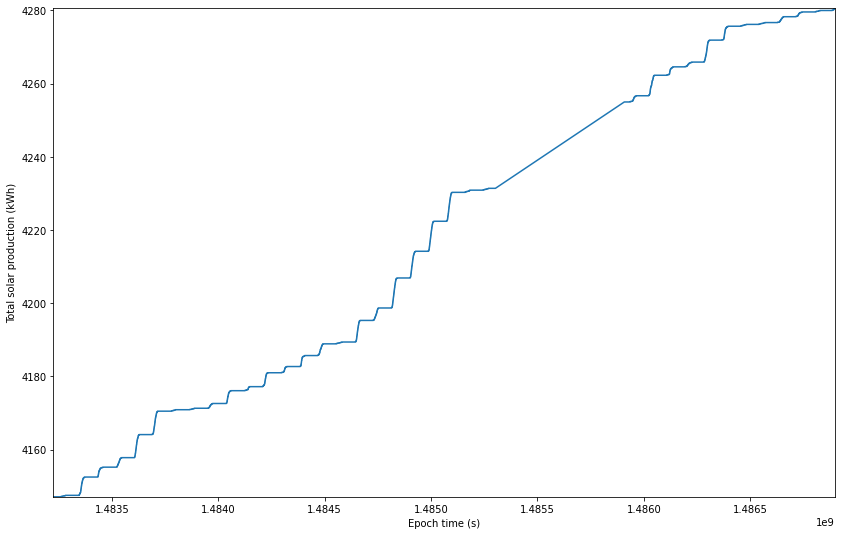

In [6]:
plt.rcParams["figure.figsize"] = (14, 9) # (w, h)
X = raw_energy[:300000]["seconds"]
Y = raw_energy[:300000]["total_solar_production"]
plt.plot(X, Y)
plt.xlabel('Epoch time (s)')
plt.ylabel('Total solar production (kWh)')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])

(1483225202.0, 1486896772.0, 13187.602, 13713.092)

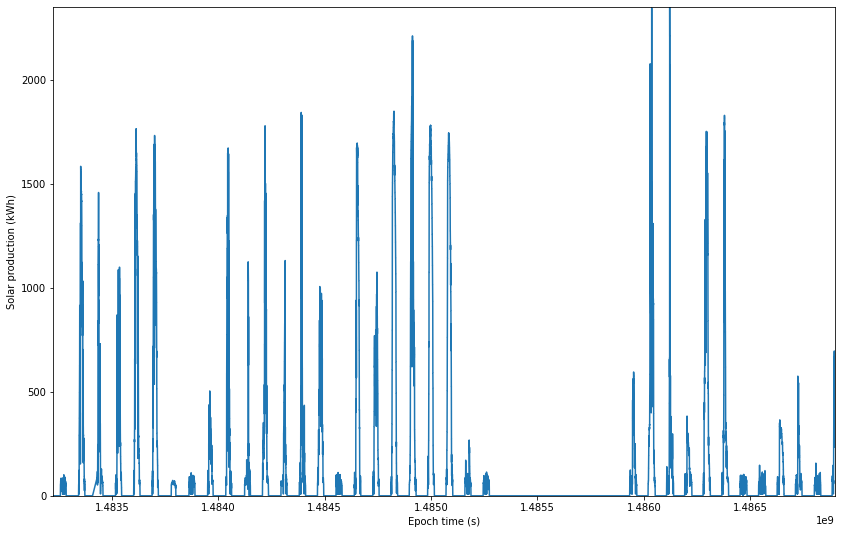

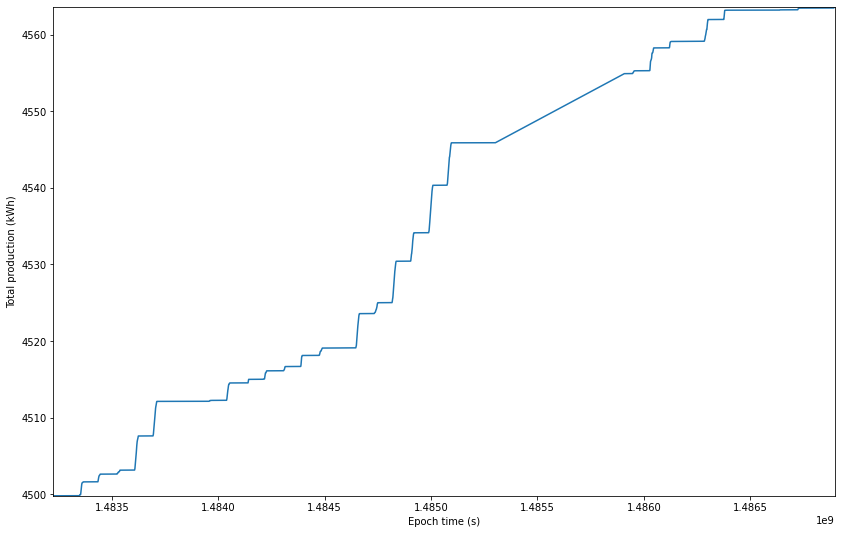

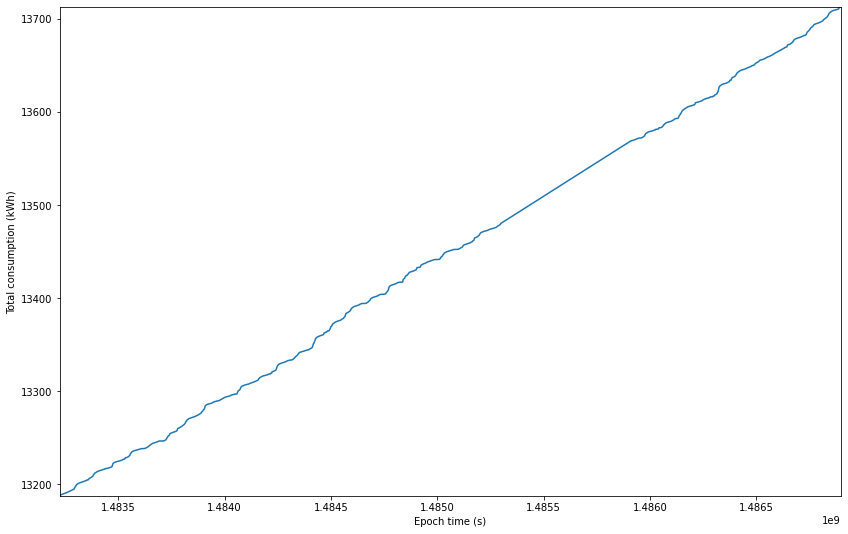

In [7]:
# TODO: explore the values in different columns (experiment with different visualizations, e.g. line, histogram, ...)
X = raw_energy[:300000]["seconds"]
Y = raw_energy[:300000]["solar_production"]
plt.plot(X, Y)
plt.xlabel('Epoch time (s)')
plt.ylabel('Solar production (kWh)')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])

plt.figure()
X = raw_energy[:300000]["seconds"]
Y = raw_energy[:300000]["total_production"]
plt.plot(X, Y)
plt.xlabel('Epoch time (s)')
plt.ylabel('Total production (kWh)')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])

plt.figure()
X = raw_energy[:300000]["seconds"]
Y = raw_energy[:300000]["total_consumption"]
plt.plot(X, Y)
plt.xlabel('Epoch time (s)')
plt.ylabel('Total consumption (kWh)')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])

### Question 1

Simple visual inspection of the data can already tell you a lot about what you are working with. The data covers 2017 , 2018, and 2019, but because the data was split sometime beforehand, some time ranges will be missing.

Assign to `question_missing_months` in the form of a list the months that are missing from the data (for example, if June and July of 2017 are missing, the list would be `["2017-06", "2017-07"]`). 

Not only are there months missing, each month that is in the data has some missing days as well. Assign to `question_num_missing_days` the number of days that is missing from each month.

You will have to convert the timestamps in the data to retrieve the months and days. Note that the Netherlands is in timezone UTC+1.

In [8]:
raw_energy.head()
raw_dates = pd.to_datetime(raw_energy["seconds"], unit='s')
local_dates = raw_dates.dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam').dt.date
local_month = raw_dates.dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam').dt.to_period('M')
missing_month = pd.period_range(start='2017-01-01', end='2019-12-31', freq='M').difference(local_month)
missing_dates = pd.date_range(start='2017-01-01', end='2019-12-31').difference(local_dates)

missing_dates_df = pd.DataFrame(index = missing_dates)
missing_dates_df['freq'] = 1
n_missing_day = missing_dates_df.groupby(pd.Grouper(freq='M')).sum()['freq']

print(missing_month)
(np.sum(list(n_missing_day)) - 30*2 - 31*2)/(len(list(n_missing_day))-len(missing_month))

c:\python39\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


PeriodIndex(['2018-11', '2018-12', '2019-11', '2019-12'], dtype='period[M]', freq='M')


6.8125

In [9]:
#// BEGIN_TODO [Q1]
question_missing_months = ['2018-11', '2018-12', '2019-11', '2019-12']
question_num_missing_days = 6.8125

### Clean the data

Data cleaning is an important part of any data analysis task. According to the general wisdom, most effort actually is spent on data cleaning. It involves preparing the data for the following steps, e.g. converting values to the right type, filling in missing values, removing outliers, normalizing the data, etc.

In the plot above you may have noticed vertical lines (you may have to plot a shorter time range to spot them). These lines correspond to 0 values and are likely to be measurement errors (e.g. the solar panel meter has crashed). Such outliers will often negatively impact the accuracy of the predictive model. However, care must be taken to properly define what constitutes an outlier and what constitutes a valid measurement. Some odd looking measurements may actually contain important evidence for proving or disproving a hypothesis. In this case the 0 values can be considered measurement errors and should be removed.

Pandas provides convenient methods for selecting subsets of the data that can be used for removing outliers:

- https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html

In [10]:
# TODO: remove the samples with production total of 0
raw_energy = raw_energy[raw_energy["total_production"] != 0]
raw_energy = raw_energy[raw_energy["total_solar_production"] != 0]
raw_energy

,date,time,seconds,total_consumption,total_production,solar_production,total_solar_production,year
0,2017-01-01,00:00:02,1483225202,13187.602,4499.785,0,4147.1,2016
1,2017-01-01,00:00:12,1483225212,13187.604,4499.785,0,4147.1,2016
2,2017-01-01,00:00:22,1483225222,13187.605,4499.785,0,4147.1,2016
3,2017-01-01,00:00:32,1483225232,13187.606,4499.785,0,4147.1,2016
4,2017-01-01,00:00:42,1483225242,13187.607,4499.785,0,4147.1,2016
...,...,...,...,...,...,...,...,...
6187015,2019-10-26,01:59:13,1572047953,23663.102,9357.350,0,12480.4,2019
6187016,2019-10-26,01:59:23,1572047963,23663.103,9357.350,0,12480.4,2019
6187017,2019-10-26,01:59:33,1572047973,23663.104,9357.350,0,12480.4,2019
6187018,2019-10-26,01:59:43,1572047983,23663.105,9357.350,0,12480.4,2019


Data that is collected in the wild will sometimes contain formatting inconsistencies. It is a good habit to check the data types:

In [11]:
raw_energy.dtypes

date                       object
time                       object
seconds                     int64
total_consumption         float64
total_production          float64
solar_production           object
total_solar_production    float64
year                        int64
dtype: object

As expected, the `'total_consumption'`, `'total_production'`, `'total_solar_production'` columns are of numerical type, however, the `solar_production` is of an `object` type (which is also used for strings), while looking at the specification of the column above we would expect a numerical type. Modeling this column later will require a numerical column, so it will need to be converted to the right type first.

In [12]:
# TODO: explore the offending values in the solar_production column
types = []
for temp in raw_energy["solar_production"]:
    this_type = type(temp)
    if this_type not in types:
        types.append(this_type)
types

[int, str]

The variable `types` shows that apart from numerical values, some data are stored by strings.

### Question 2

Convert empty strings in the `'solar_production'` column to `np.nan`. Convert the remaining values in the `'solar_production'` column to `float` type, and copy the resulting column to a variable named `solar_production_column`.

In [13]:
# for i in raw_energy.index:
#     if raw_energy.loc[i, 'solar_production'] == '':
#         raw_energy.loc[i, 'solar_production'] = np.nan

raw_energy.loc[:, 'solar_production'] = pd.to_numeric(raw_energy['solar_production'], errors='coerce')

In [14]:
#// BEGIN_TODO [Q2]
solar_production_column = raw_energy['solar_production']
#// END_TODO [Q2]

We can check the data type now

In [15]:
raw_energy.dtypes

date                       object
time                       object
seconds                     int64
total_consumption         float64
total_production          float64
solar_production          float64
total_solar_production    float64
year                        int64
dtype: object

### Engineer features

The goal of this assignment is to predict the hourly energy output of the solar panels given the weather forecast. This requires to relate the energy samples with the weather samples, basically attaching the energy production label to the weather measurements. However, the *total* energy and weather samples are taken approximately every 10 seconds and 10 minutes, respectively.

####  Aggregate per hour

We can use pandas grouping functions to aggregate the samples per hour, taking the largest  measurement in that hour.

In [16]:
col = "total_solar_production"
energy = raw_energy.copy()
times = pd.to_datetime(energy["seconds"], unit='s')

energy = energy.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[[col]].agg(np.max)
energy.index.names = ["year", "month", "day", "hour"]

### Question 3 ###

Note that the hourly aggregation using the maximum works well for columns containing the totals. Does it also work for the `'solar_production'` column?

1. Yes, but the aggregation method needs to be changed to fit the solar_production data type
2. Yes, the same aggregation method can be applied
3. No, it's not possible to aggegrate over the solar_production field
4. No, aggregating over the solar_production field in any way does not make sense.
5. None of the above.

Assign an integer corresponding to the correct answer to variable `question_aggregation`.

In [17]:
#// BEGIN_TODO [Q3]
question_aggregation = 1
#// END_TODO [Q3]

After aggregation, some cells can contain `Nan` values (e.g. when trying to compute a maximum for an hour during which no samples were recorded). Therefore, after performing such operations one should decide what to do with any NaN values. In this case we chose to remove such samples.

In [18]:
energy = energy.dropna()

After grouping, merging and slicing operations, the index of a data frame might need to be recomputed, to reflect the new ordering of rows.

In [19]:
energy = energy.reset_index()

#### Compute the hourly production

We are interested in predicting the solar panel output in a given hour. However, the `'total_solar_production'` column in the energy data frame at this point contains the total solar panel output until the end of that hour. Assuming that the data set contains a sample for every hour, i.e. there are no gaps, the hourly output can be compouted by taking the difference between the previous sample.

In [20]:
energy["production"] = energy[col] - energy[col].shift(1)
energy = energy.dropna().reset_index()

### Question 4 ###

After creating the production column there are NaNs in the data. Where do they come from, and why is the index recomputed?

1. The NaN values are caused by missing values in the original data due to sensor errors, and the index is reset because a column has been added.
2. The NaN values are caused by missing values in the original data due to the way the column is calculated, and the index is reset because a column has been added.
3. The NaN values are caused by missing values in the original data due to sensor errors, and the index is reset because the number of rows has changed.
4. The NaN values are caused by missing values in the original data due to the way the column is calculated, and the index is reset because the number of rows has changed.

Assign the integer corresponding to the correct answer to the variable `question_production`.

In [21]:
#// BEGIN_TODO [Q4]
question_production = 4
#// END_TODO [Q4]

Now we can perform a similar aggregation for the `clouds` column in the weather data. Note that rather than choosing the maximum, we take the average `clouds` value per hour.

In [22]:
weather = raw_weather.copy()
times = pd.to_datetime(weather["time"])
weather = weather.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])["clouds"].agg(np.mean)
weather.index.names = ["year", "month", "day", "hour"]
weather = weather.reset_index()

#### Merge the data frames

Now that both data frames are expressed in terms of hours and the energy data frame contains the hourly solar panel output, we can use pandas to merge them.

**Important:** when dealing with times in data from various sources one must be very carefull about the semantics of the time, such as the time-zone or the daylight-saving. Luckily, in this assignment both energy and weather data use UTC time, so no extra preprocessing is required.

In [23]:
data = pd.merge(energy, weather).dropna().reset_index(drop=True)
data.head()

,index,year,month,day,hour,total_solar_production,production,clouds
0,1,2017,1,1,0,4147.1,0.0,3.0
1,2,2017,1,1,1,4147.1,0.0,3.0
2,3,2017,1,1,2,4147.1,0.0,3.0
3,4,2017,1,1,3,4147.1,0.0,3.0
4,5,2017,1,1,4,4147.1,0.0,3.0


#### Explore the engineered features

After engineering features it is a good idea to explore the data set again, to see if extra cleaning is required.

In [24]:
data

,index,year,month,day,hour,total_solar_production,production,clouds
0,1,2017,1,1,0,4147.1,0.0,3.0
1,2,2017,1,1,1,4147.1,0.0,3.0
2,3,2017,1,1,2,4147.1,0.0,3.0
3,4,2017,1,1,3,4147.1,0.0,3.0
4,5,2017,1,1,4,4147.1,0.0,3.0
...,...,...,...,...,...,...,...,...
16573,17000,2019,10,297,19,12475.1,0.0,2.0
16574,17001,2019,10,297,20,12475.1,0.0,3.0
16575,17002,2019,10,297,21,12475.1,0.0,3.0
16576,17003,2019,10,297,22,12475.1,0.0,3.0


0.0 134.20000000000073


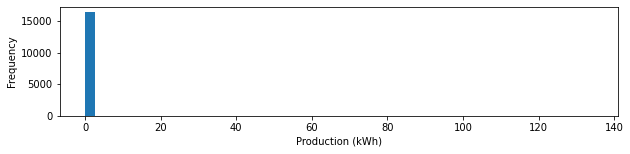

In [25]:
values = data["production"].values
plt.figure(figsize=(10, 2))
plt.hist(values, 50);
plt.xlabel('Production (kWh)')
plt.ylabel('Frequency')
print (min(values), max(values))

The small variance of the values and their large range suggests there are some outliers. This can be also visualized in a different way.

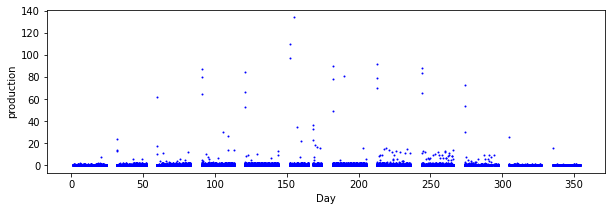

In [26]:
def plot(df, col):
    x = df["day"]
    plt.figure(figsize=(10,3))
    plt.plot(x, df[col], 'bo', markersize=1)
    plt.xlabel('Day')
    plt.ylabel(col)

plot(data, "production")

The figure suggests that there are indeed outliers in the energy production data.

### Question 5

The plot shows some outliers. How do you explain these? Note that there may be more than one correct anwser.

1. There is actually an oversight in the previous calculations which causes the outliers.
2. There is some unclean data present due to sensor errors.
3. There were some very clear and sunny days.
4. The outliers represent multiple days of production.

Assign the integer(s) corresponding to the correct answer(s) as a list to the variable `question_outliers`.

In [27]:
maximum_kwh = 153*1000*60/(3.6*pow(10, 6))
maximum_kwh

2.55

In [28]:
#// BEGIN_TODO [Q5]
question_outliers = [2, 4]
#// END_TODO [Q5]

Note that when removing the energy samples containing 0 values in `raw_energy` earlier, it was clear how to define an outlier. In this case, however, one must carefully decide how to define an outlier, to avoid introducing bias. You can read more about outlier detection here:

- Section 3.3.3 of "Introduction to Statistical Learning"
- http://scikit-learn.org/stable/modules/outlier_detection.html

### Question 6

How do you best define an outlier for this data set?

1. Calculate the average production, and define an outlier based on standard deviations.
2. Build a model for the expected production, and label outliers based on the model predictions.
3. Set a fixed threshold for outliers based on the characteristics of the solar panels.
4. Estimate a fixed threshold for outliers by hand based on the above plot.

Assign an integer corresponding to the correct answer to variable `question_outlier_definition`.

In [29]:
#// BEGIN_TODO [Q6]
question_outlier_definition = 3
#// END_TODO [Q6]

### Question 7

Remove the outliers from the `data` data frame. Assign the resulting data frame to variable `data_no_outliers`. 

In [30]:
# TODO: remove outliers
data = data[data["production"] <= maximum_kwh]
data = data.reset_index()
data

,level_0,index,year,month,day,hour,total_solar_production,production,clouds
0,0,1,2017,1,1,0,4147.1,0.0,3.0
1,1,2,2017,1,1,1,4147.1,0.0,3.0
2,2,3,2017,1,1,2,4147.1,0.0,3.0
3,3,4,2017,1,1,3,4147.1,0.0,3.0
4,4,5,2017,1,1,4,4147.1,0.0,3.0
...,...,...,...,...,...,...,...,...,...
16427,16573,17000,2019,10,297,19,12475.1,0.0,2.0
16428,16574,17001,2019,10,297,20,12475.1,0.0,3.0
16429,16575,17002,2019,10,297,21,12475.1,0.0,3.0
16430,16576,17003,2019,10,297,22,12475.1,0.0,3.0


In [31]:
#// BEGIN_TODO [Q7]
data_no_outliers = data
#// END_TODO [Q7]

Data visualization is often helpful to check if the results of our data processing and analysis meet our expectations.

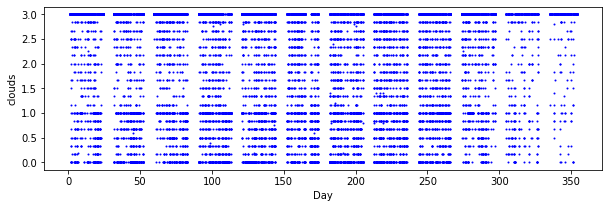

In [32]:
# TODO: plot the clouds feature
plot(data, "clouds")

### Question 8

Now that the data has been cleaned and converted, let's take another look. Aggregate the months that are present in the training data, and determine which month of the year is on average the most productive in terms of solar production across the 3 years. Assign the integer corresponding to the month to `most_productive_month`.

In [33]:
month_data = data.groupby(by=[data.month])['production'].agg(np.mean)
print(month_data)
month_data.idxmax()

month
1     0.104966
2     0.199329
3     0.232970
4     0.391536
5     0.488070
6     0.430386
7     0.550676
8     0.317328
9     0.227973
10    0.161847
11    0.141924
12    0.055342
Name: production, dtype: float64


7

In [34]:
#// BEGIN_TODO [Q8]
most_productive_month = 7
#// END_TODO [Q8]

### Train a model

For training and evaluating the perfromance of a model we need to split the data into a training and a test.

In [35]:
X = data[["clouds"]].values
y = data["production"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluate the model

After a model is trained we would like to estimate how well it is performing, whether we can actually trust its predictions if it were deployed. Model performance can be estimated using various visualisations and statistics (see Section 3.1.3 of [ISLR])

#### Model fit

If the feature space is 1 or 2 dimensional, then we can easily plot the model to illustrate how well it fits the test data.

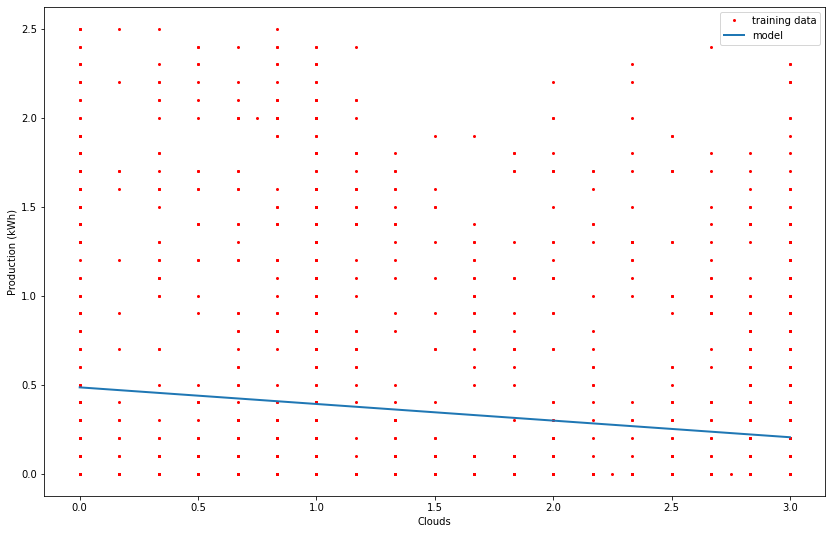

In [38]:
x_plot = np.linspace(min(X), max(X), 100)
X_plot = x_plot.reshape(-1, 1)
y_plot = model.predict(X_plot)

dots, = plt.plot(X_test, y_test, 'bo', markersize=2, color="red", label="training data");
line, = plt.plot(x_plot, y_plot, linewidth=2, label="model");
plt.xlabel('Clouds')
plt.ylabel('Production (kWh)')
plt.legend(handles=[dots, line]);

We can compute the R2 score to assign a number to how well the model fits the data. It estimates how much of the variance in the data is explained by the model, i.e. how well the model fits the data. A score of 1 means the model captures all of the variance, and a score of 0 means the model does not capture any of the variance.

You can read more about the R2 score in Section 3.1.3 of "Introduction to Statistical Learning".

In [39]:
model.score(X_test, y_test)

0.035364488629749835

#### Residuals

We can also plot a histogram of the residuals (or errors), i.e. the deviations of the values predicted by our model from the ground truth values (from the test set):

Text(0, 0.5, 'Frequency')

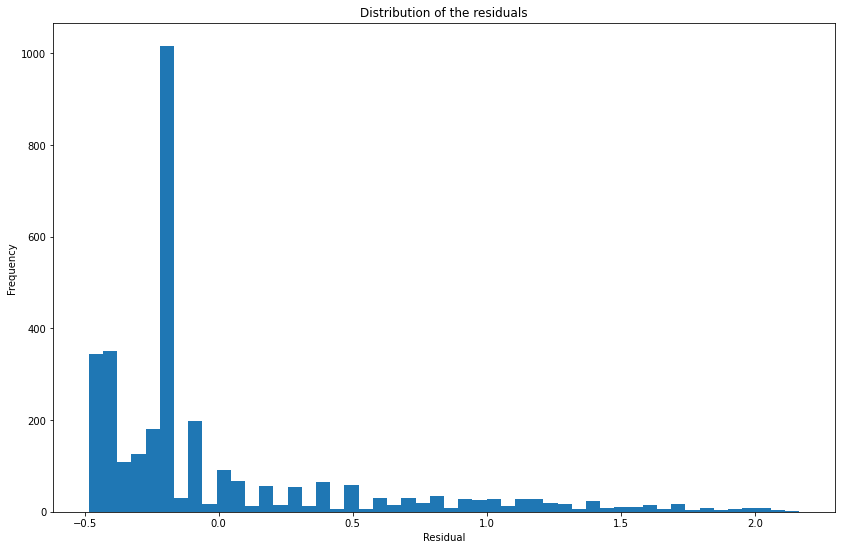

In [40]:
y_pred = model.predict(X_test)
plt.title("Distribution of the residuals")
plt.hist(y_test - y_pred, 50);
plt.xlabel('Residual')
plt.ylabel('Frequency')

Looking at the histogram you will notice that distribution of the residuals is not symmetric.

### Question 9

Does the model tend to over-estimate, or under-estimate the solar panel output?

1. The model tends to under-estimate.
2. The model tends to over-estimate.
3. The model is not biased

Assign an integer corresponding to the correct answer to variable `question_bias`. 

According to the residual figure, we can clearly see that `y_pred` are generally bigger than the real value `y_test`.

In [41]:
#// BEGIN_TODO [Q9]
question_bias = 2
#// END_TODO [Q9]

If the model is not biased, or if we are not interested in the bias, then we can compute the mean absolute deviation (MAD) to estimate the expected error of a prediction. E.g. a MAD = 0.345 means that we expect on average our predition to be off by 0.345kWh.

In [42]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.39377934680165627

### Improve the model

We have shown here a simple linear model mapping the `clouds` feature to the `hourly_production` label. However, this model does not perform very well. The problem could be that the model is underfitting or overfitting the data. You can find more about under- and overfitting in Section 2.1.2, 2.1.3, 6.1 of "Introduction to Statistical Learning".

### Question 10 ###

Is the model underfitting or overfitting? What makes you say that? Investigate and then explain in at most 100 words why you think the model is underfitting or overfitting. Assign the explanation to the variable `question_fitting`.

In [43]:
#// BEGIN_TODO [Q10]
question_fitting = '''The model is underfitting. Because from the clouds-production figure above, we 
                      can see that no matter how much the clouds are, the production values are distributed from 0
                      to 2.5. It means that, the model trained only by the clouds cannot fit the target (production).
                      Clouds are not enough decisive. Also, from the figure we can see that linear model is not 
                      complex enough to model production by only clouds.'''
#// END_TODO [Q10]

One could try several things to improve the model.

#### Add more features

The simple linear model assumed that there is a strong relation ship between the clouds (or their absence) and the output of the solar panels. However, clouds alone are not a sufficient indicator, e.g. during the night. You may plot a histogram showing how the `clouds` values are distributed during the 24 hours of a day:

Text(0, 0.5, 'Clouds')

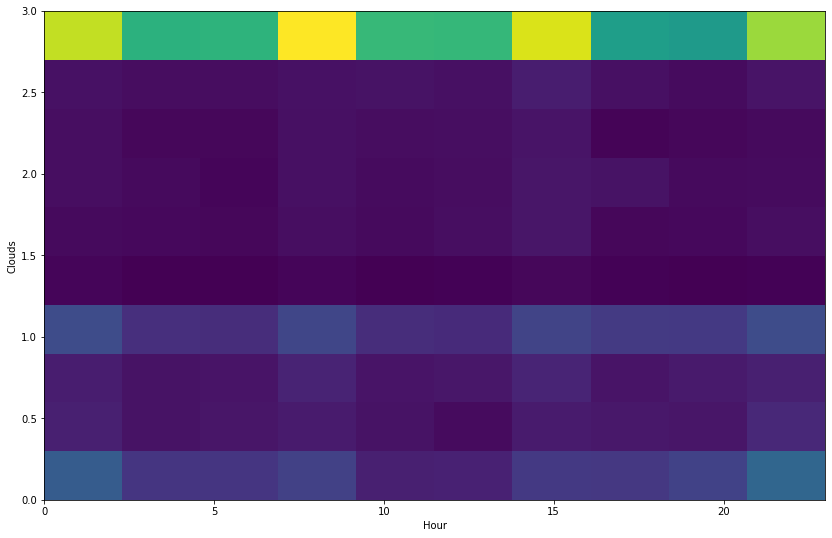

In [44]:
plt.hist2d(weather.dropna().hour.values, weather.dropna().clouds.values);
plt.xlabel('Hour')
plt.ylabel('Clouds')

### Question 11

Why is the `clouds` column alone not a good indicator for the solar panel output?

Answer this question in max. 100 words and assign your string answer to the variable `question_clouds`.

In [45]:
#// BEGIN_TODO [Q11]
question_clouds = '''Because no matter how much the clouds is, the production values are almost distributed
                     from 0 to 2.55 according to the clouds-production figure above (red). It means that the
                     clouds is not a decisive parameter. One at least needs to consider the time (day or night)
                     '''
#// END_TODO [Q11]

While the `clouds` column alone may not be sufficient for predicting the solar planel output, it can be used in combination with other features. Therefore, one way of improving the simple linear model could be to extend it with more features. You can gain insight into which features could be relevant by plotting the relationship between the features and the labels.

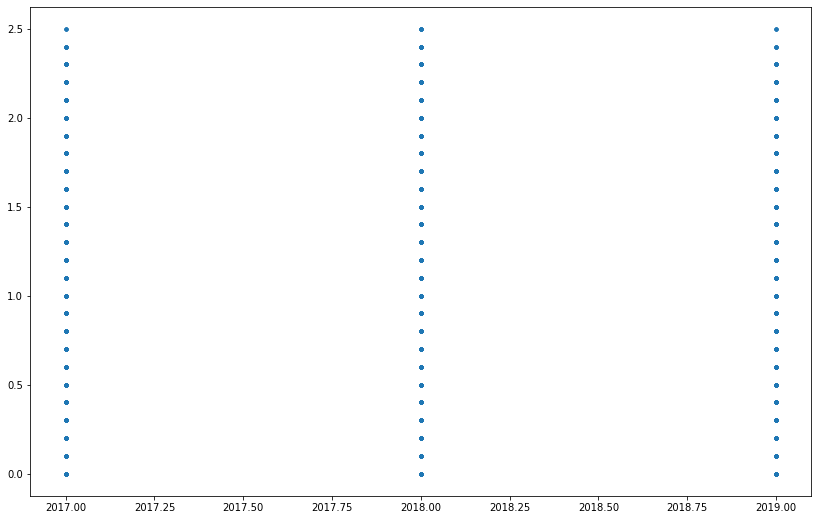

In [46]:
# TODO: use the scatter matrix graph to explore the relationship between the features
# year
plt.figure()
plt.plot(data["year"].values, data["production"].values, '.')

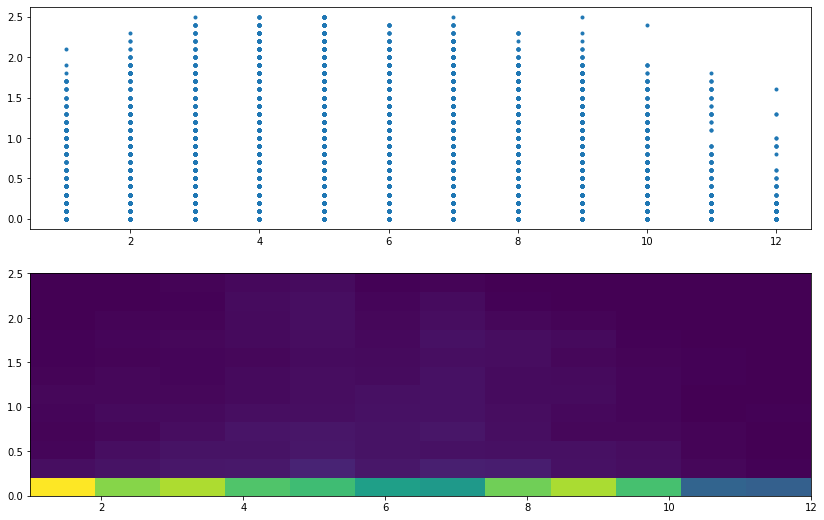

In [47]:
# month
plt.figure()
plt.subplot(211)
plt.plot(data["month"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["month"].values, data["production"].values, bins=12);

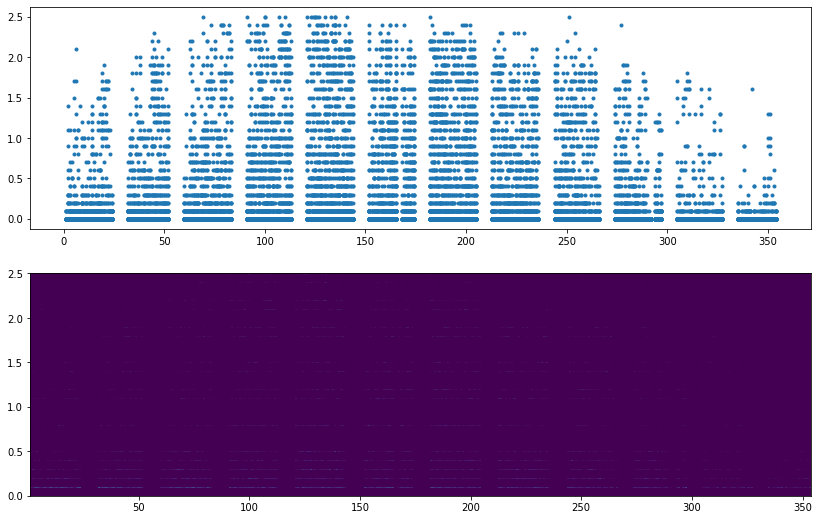

In [48]:
# day
plt.figure()
plt.subplot(211)
plt.plot(data["day"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["day"].values, data["production"].values, bins=365);

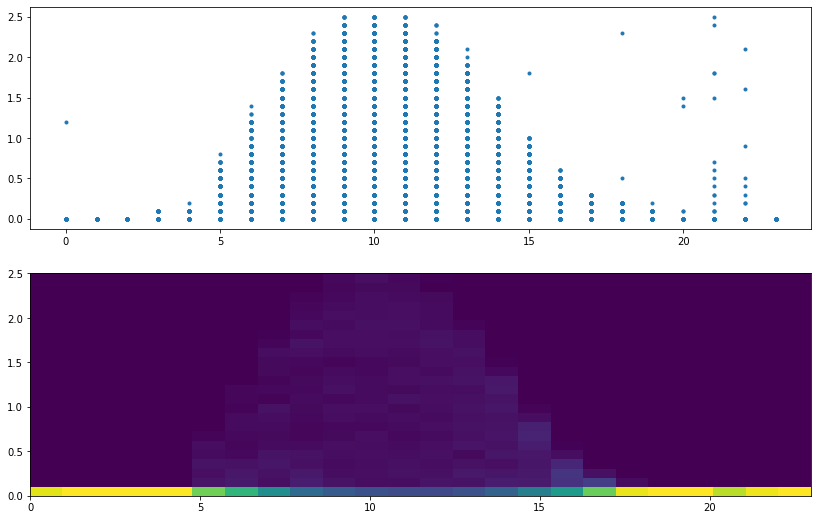

In [49]:
# hour
plt.figure()
plt.subplot(211)
plt.plot(data["hour"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["hour"].values, data["production"].values, bins=24);

In [50]:
wea_attrs = raw_weather.copy()
wea_attrs = wea_attrs.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[
    ["air pressure", "humidity", 'visibility', 'wind speed', 'temperature']].agg(np.mean)
wea_attrs.index.names = ["year", "month", "day", "hour"]
wea_attrs = wea_attrs.reset_index()
data = pd.merge(data, wea_attrs).dropna().reset_index(drop=True)
data.head()

,level_0,index,year,month,day,hour,total_solar_production,production,clouds,air pressure,humidity,visibility,wind speed,temperature
0,0,1,2017,1,1,0,4147.1,0.0,3.0,1025.550000,99.0,275.500000,3.000000,-1.650000
1,1,2,2017,1,1,1,4147.1,0.0,3.0,1024.650000,99.0,392.500000,3.166667,-1.416667
2,2,3,2017,1,1,2,4147.1,0.0,3.0,1024.066667,99.0,332.333333,4.000000,-1.300000
3,3,4,2017,1,1,3,4147.1,0.0,3.0,1023.166667,99.0,511.500000,3.333333,-1.216667
4,4,5,2017,1,1,4,4147.1,0.0,3.0,1022.266667,99.0,1758.333333,3.333333,-1.216667


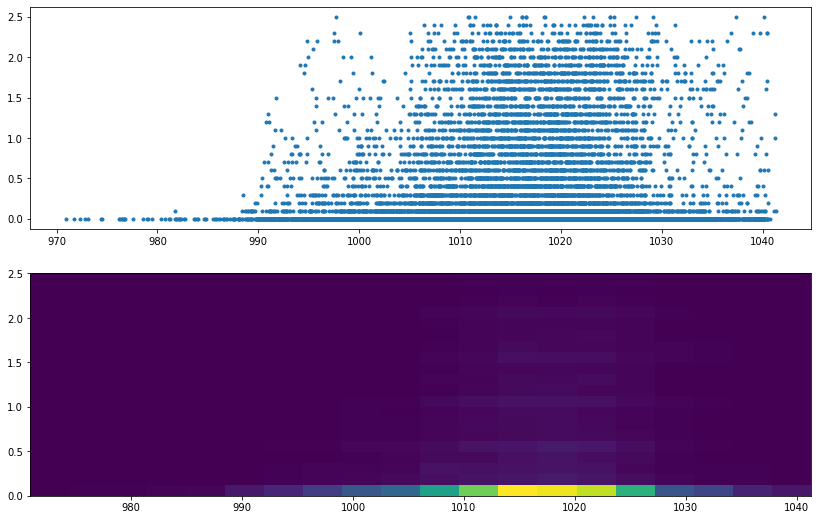

In [51]:
plt.figure()
plt.subplot(211)
plt.plot(data["air pressure"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["air pressure"].values, data["production"].values, bins=20);

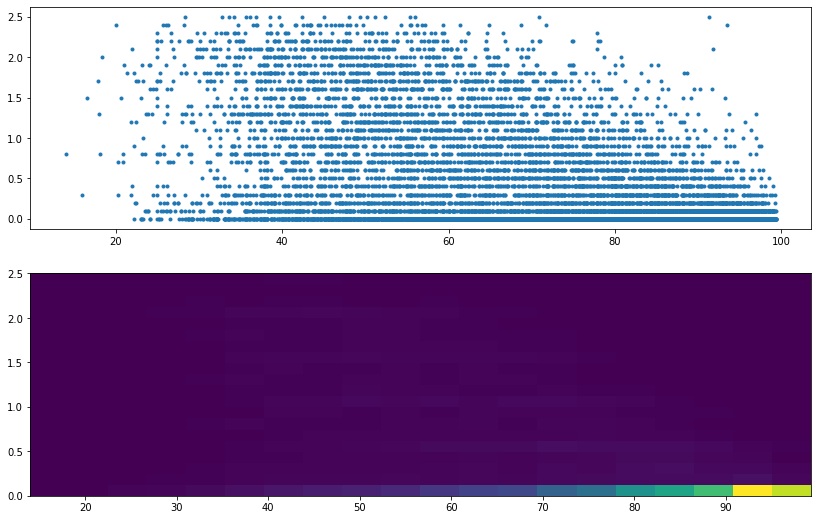

In [52]:
plt.figure()
plt.subplot(211)
plt.plot(data["humidity"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["humidity"].values, data["production"].values, bins=20);

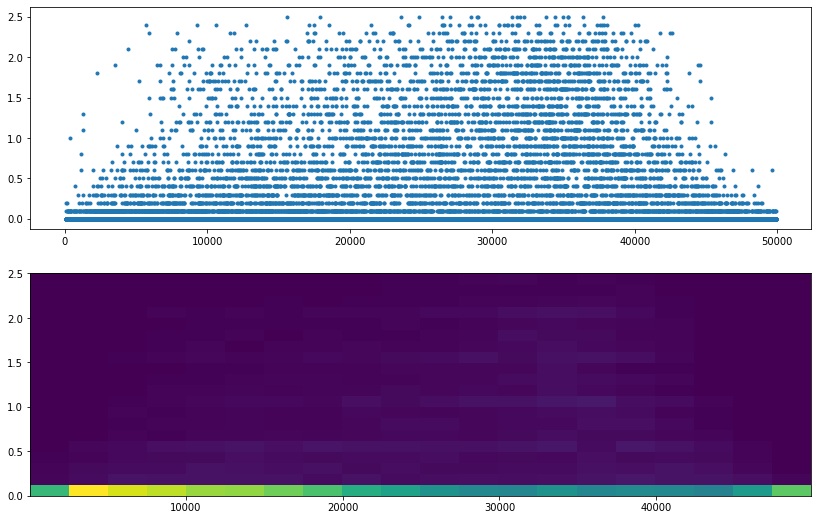

In [53]:
plt.figure()
plt.subplot(211)
plt.plot(data["visibility"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["visibility"].values, data["production"].values, bins=20);

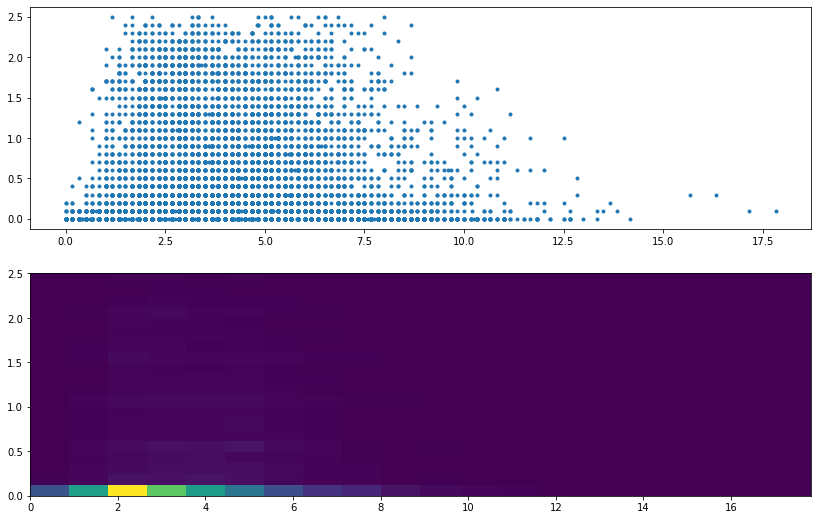

In [54]:
plt.figure()
plt.subplot(211)
plt.plot(data["wind speed"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["wind speed"].values, data["production"].values, bins=20);

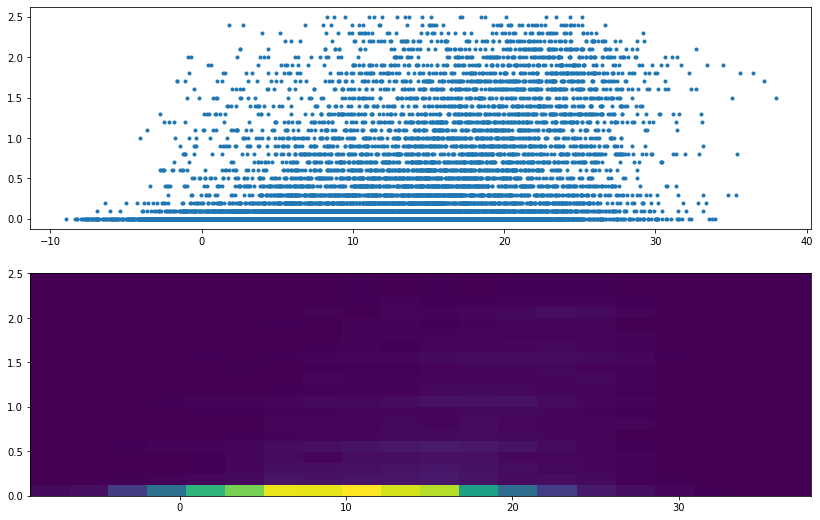

In [55]:
plt.figure()
plt.subplot(211)
plt.plot(data["temperature"].values, data["production"].values, '.')
plt.subplot(212)
plt.hist2d(data["temperature"].values, data["production"].values, bins=20);

### Question 12 ###

Which features are most promising for predicting the solar panel output? Select the two features that are most strongly correlated with production.

- `'year'`
- `'month'`
- `'day'`
- `'hour'`
- `'air pressure'`
- `'humidity'`
- `'visibility'`
- `'wind speed'`
- `'temperature'`

Assign a list of strings corresponding to the promising features to variable `question_features`.

In [56]:
#// BEGIN_TODO [Q12]
question_features = ['humidity', 'hour']
#// END_TODO [Q12]

Note that using additional features may require aggregating them per hour. The `clouds` feature was aggregated taking the maximum value within a given hour, but this may not be suitable for all features.

### Question 13 ###

Using your new-found knowledge of the features, re-define the data on which you train and evaluate your model. Try to improve your model as much as possible by only changing the selection of features.

Assign your new data, new model and the corresponding MAD score to the variables `improved_data`, `improved_model`, `improved_mad`, respectively.

In [58]:
# TODO: improve model
data = data.dropna().reset_index(drop=True)
# X = data[["hour", "day"]].values
X = data[["clouds", "day", "hour", "humidity", "visibility", "temperature"]].values
y = data["production"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8728)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)
# cloud 0.3915

0.308616856895471

In [59]:
#// BEGIN_TODO [Q13]
improved_data =  X
improved_model = model
improved_mad = 0.3046130952585554
#// END_TODO [Q13]

#### Choose a more or less flexible model

Another way is to add flexibility to the model e.g. by changing it to a polynomial model or a neural network. You can read more about simple extensions of the linear model in Section 3.3.2 and 6.2 of "Introduction to Statistical Learning".

Linear regression is far from the only modeling we can do here. Another model we could use is that of a Decision Tree. What is nice about these types of models is that they show the exact sequence of decisions that a model makes in order to arrive at a prediction. You can read more about Decision Trees at [https://scikit-learn.org/stable/modules/tree.html]. Note that in this instance, we will want to use the Decision Tree regression model, not the classification model.

### Question 14

The Decision Tree model has quite a number of parameters, and we encourage you to do so to see their impact on the model's performance. One of the most important ones is that of tree depth. What happens with an increase in depth? Note that there may be more than one correct answer.

1. An increase in depth helps to avoid overfitting.
2. An increase in depth helps to avoid underfitting.
3. An increase in depth makes the model more biased towards new data.
4. An increase in depth makes the model less biased towards new data.

Assign the integer(s) corresponding to the correct answer(s) as a list to the variable `decision_tree_depth`. 

In [60]:
#// BEGIN_TODO [Q14]
decision_tree_depth = [2, 3]
#// END_TODO [Q14]

### Question 15

Train a Decision Tree model an assign it to the variable `decision_tree`. Inspect it and determine what the three most influential features are according to this model. Assign the names of these features as a list of strings to the variable `decision_tree_features`. You may want to plot the resulting model to help you inspect it. 

mae: 0.15540006084577307


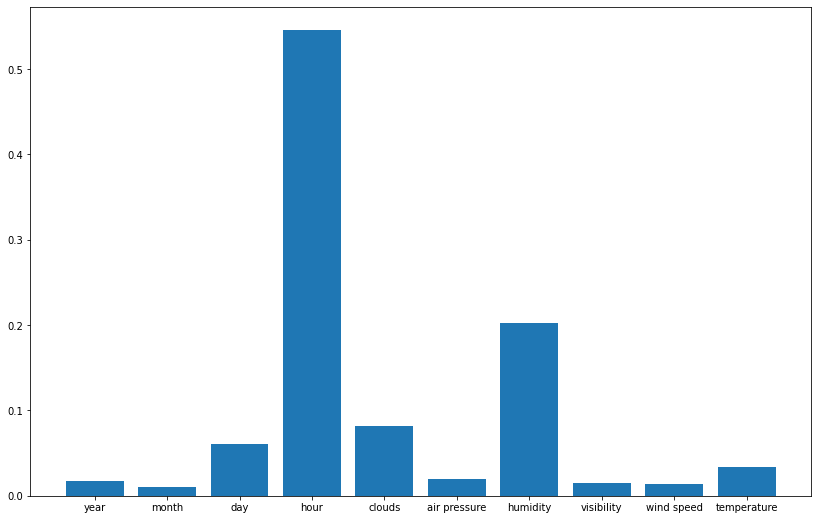

In [61]:
# TODO: train and inspect decision tree
from sklearn import tree

feature = ["year", "month", "day", "hour", "clouds", "air pressure", "humidity", "visibility", "wind speed", "temperature"]
X = data[feature].values
y = data["production"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_tree = tree.DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=10, 
                                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                             max_features=None, random_state=None, max_leaf_nodes=None, 
                                             min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
regression_tree = regression_tree.fit(X_train, y_train)
y_pred = regression_tree.predict(X_test) 
print('mae:', mean_absolute_error(y_test, y_pred))
# summarize feature importance
importance = regression_tree.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], feature)
plt.show()

In [62]:
#// BEGIN_TODO [Q15]
decision_tree = regression_tree
decision_tree_features = ["hour", "humidity", "clouds"]
#// END_TODO [Q15]

### Simulate the forecasting

The `weather_171819_test.csv` file contains the weather data that was held out from `weather_171819.csv` used for training the solar panel output predictor. This data simulates the weather forcasts and is used for evaluating how your model would perform if it was deployed.

In [63]:
weather_test = pd.read_csv('./weather_171819_test.csv')
weather_test.head()

,time,clouds,temperature,humidity,wind direction,wind speed,visibility,air pressure,year
0,2017-01-25T00:00:00Z,3.0,-0.3,91.0,OZO,1.0,3170.0,1031.2,2017
1,2017-01-25T00:10:00Z,3.0,-0.4,90.0,O,2.0,3160.0,1031.2,2017
2,2017-01-25T00:20:00Z,3.0,-0.4,90.0,OZO,2.0,2970.0,1031.1,2017
3,2017-01-25T00:30:00Z,3.0,-0.3,91.0,ZZO,2.0,2940.0,1031.0,2017
4,2017-01-25T00:40:00Z,3.0,-0.3,90.0,ZO,1.0,2980.0,1031.0,2017


Provide the predictions for the hourly solar panel output for the given weather forecasts, i.e. populate the `production` column in the following data frame:

In [64]:
prediction = weather_test.copy()
times = pd.to_datetime(prediction["time"])
prediction['month'] = times.dt.month
prediction['day'] = times.dt.dayofyear
prediction['hour'] = times.dt.hour
prediction = prediction.drop(prediction[prediction['hour'] == 0].index)
prediction = prediction[['month', 'day', 'hour']]
prediction = prediction.drop_duplicates().reset_index(drop=True)
prediction['production'] = np.nan
prediction.head()

,month,day,hour,production
0,1,25,1,NaN
1,1,25,2,NaN
2,1,25,3,NaN
3,1,25,4,NaN
4,1,25,5,NaN


**Important:** your model will be evaluated on the held out test set. It is therefore safe to train your *final* model on the entire data set that was provided (rather than the X_train, y_train subsets from the train/test split above), to captures all of the information that is available to you.

### Question 16

Fill in the `'production'` column in the prediction data frame with your predictions (do not reorder the rows). Assign the values from the `'production`' column as a Python list to the variable `forecast`. You may use any predictive model from the `sklearn` package (please do not use any packages that are not already included in this notebook). You can take a look through the contents of `sklearn` at [https://scikit-learn.org/stable/supervised_learning.html] to find supervised models that suit this purpose, such as Random Forests and Multi-layer Perceptrons. 

In [66]:
# TODO: forecast
import time

time_start=time.time()

wea_feature = ["clouds", "air pressure", "humidity", "visibility", "wind speed", "temperature"]
wea_test = weather_test.copy()
times = pd.to_datetime(wea_test["time"])
wea_test = wea_test.groupby([
    times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[wea_feature].agg(np.mean)
wea_test.index.names = ["year", "month", "day", "hour"]
wea_test = wea_test.reset_index()

wea_test = wea_test.drop(wea_test[wea_test['hour'] == 0].index)
wea_test = wea_test.reset_index(drop=True)
wea_test = wea_test.drop(columns=['year'])

from sklearn import ensemble

rf_regression_model = ensemble.RandomForestRegressor(n_estimators=48, criterion='mae', max_depth=None, 
                                                     min_samples_split=2, min_samples_leaf=1, 
                                                     min_weight_fraction_leaf=0.0, max_features='auto', 
                                                     max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                                     min_impurity_split=None, bootstrap=True, oob_score=False, 
                                                     n_jobs=None, random_state=None, verbose=0, 
                                                     warm_start=False, ccp_alpha=0.0, max_samples=None)

feature = ["month", "day", "hour", "clouds", "air pressure", "humidity", "visibility", "wind speed", "temperature"]
X = data[feature].values
y = data["production"].values
rf_regression_model = rf_regression_model.fit(X, y)
y_pred = rf_regression_model.predict(wea_test) 
wea_test['pred'] = y_pred

for i in range(0, len(prediction)):
    this_res = wea_test[
                    (wea_test['month'] == prediction.loc[i, 'month']) & 
                    (wea_test['day'] == prediction.loc[i, 'day']) & 
                    (wea_test['hour'] == prediction.loc[i, 'hour'])
               ]['pred'].mean()
    prediction.loc[i, 'production'] = this_res

time_end=time.time()
print('time cost', time_end-time_start, 's')

prediction['production']

time cost 305.09637784957886 s


0       0.019444
1       0.081944
2       0.052083
3       0.077083
4       0.112500
          ...   
1914    0.123958
1915    0.137500
1916    0.102083
1917    0.069792
1918    0.061458
Name: production, Length: 1919, dtype: float64

In [67]:
#// BEGIN_TODO [Q16]
forecast = list(prediction['production'])
#// END_TODO [Q16]

For automating the evaluation of your predictions, call the evaluate function that is defined in the `evaluate.py` script (do not edit the code lines below!):

In [68]:
from evaluate_stub import *
evaluate(prediction)

'This is a stub for the evaluation function. The real implementation will compare your predictions with the held out production measurements.'

As a sanity check, make sure that the `prediction` data frame contains a `production` column and 1919 rows.

Your solution will be evaluated based on the mean absolute error metric.

### Reliability

We often assume that the trained model will operate on data from the same distribution as the data it was trained on (see Chapter 1 of the book "Dataset Shift in Machine Learning"). However, sometimes these assumptions are not true.

Using the model you trained for question 13, evaluate the model's performance on the data set provided below. It contains the energy and weather data for part of the year 2020. Note that as before, this is raw data. You will need to do some cleaning.

In [69]:
raw_energy_20 = pd.read_csv('./energy_20.csv')
raw_weather_20 = pd.read_csv('./weather_20.csv')

In [86]:
# TODO: Evaluate the model from previous question on the new data

def clean_format_energy(raw_energy):
    raw_energy = raw_energy[raw_energy["total_production"] != 0]
    raw_energy = raw_energy[raw_energy["total_solar_production"] != 0]
    raw_energy.loc[:, 'solar_production'] = pd.to_numeric(raw_energy['solar_production'], errors='coerce')
    # re-format
    col = ["total_consumption", "total_solar_production"]
    energy = raw_energy.copy()
    times = pd.to_datetime(energy["seconds"], unit='s')
    energy = energy.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[col].agg(np.max)
    energy.index.names = ["year", "month", "day", "hour"]
    energy = energy.dropna().reset_index()
    energy["production"] = energy["total_solar_production"] - energy["total_solar_production"].shift(1)
    energy["consumption"] = energy["total_consumption"] - energy["total_consumption"].shift(1)
    energy = energy.dropna().reset_index()
    # clean the outliers
    energy = energy[energy["production"] <= maximum_kwh]
    energy = energy.dropna().reset_index(drop=True)
    return energy


# generate weather data
def clean_format_weather(raw_weather):
    attrs = ['clouds', 'air pressure', 'humidity', 'visibility', 'wind speed', 'temperature']
    weather = raw_weather.copy()
    times = pd.to_datetime(weather["time"])
    weather = weather.groupby([times.dt.year, times.dt.month, times.dt.dayofyear, times.dt.hour])[attrs].agg(np.mean)
    weather.index.names = ["year", "month", "day", "hour"]
    weather = weather.reset_index()
    return weather


energy_20 = clean_format_energy(raw_energy_20)
weather_20 = clean_format_weather(raw_weather_20)

weather_20['pred'] = improved_model.predict(weather_20[
    ["clouds", "day", "hour", "humidity", "visibility", "temperature"]].values)

energy_20['pred'] = np.nan

for i in range(0, len(energy_20)):
    this_res = weather_20[
                    (weather_20['month'] == energy_20.loc[i, 'month']) & 
                    (weather_20['day'] == energy_20.loc[i, 'day']) & 
                    (weather_20['hour'] == energy_20.loc[i, 'hour'])]['pred'].mean()
    energy_20.loc[i, 'pred'] = this_res

energy_20 = energy_20.dropna().reset_index(drop=True)
# energy_20
mean_absolute_error(energy_20['production'], energy_20['pred'])

0.3321480049767098

As we can see, the `MAE` increases from 0.3086 to 0.3321 using the linear model in `Question 13`.

### Question 17

Investigate and then explain in at most 100 words in the variable `question_change` what you think may be responsible for the change in your model's performance.

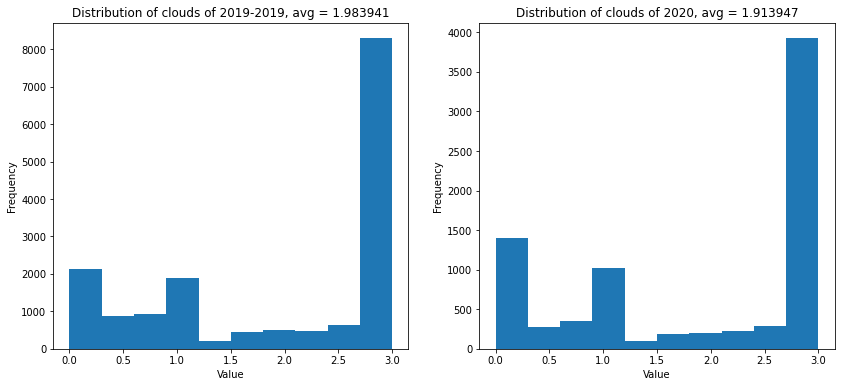

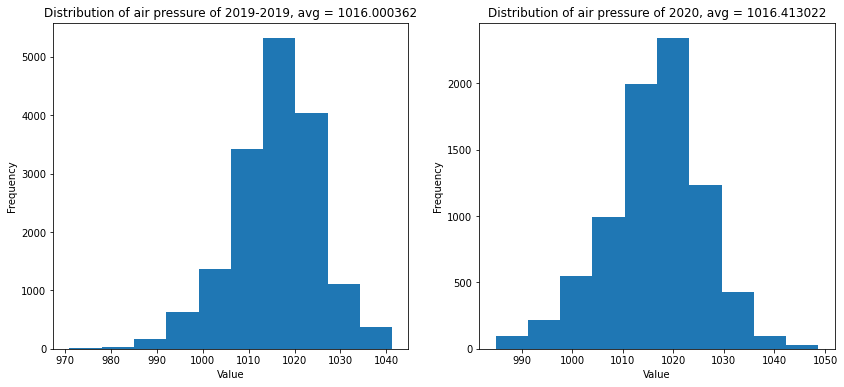

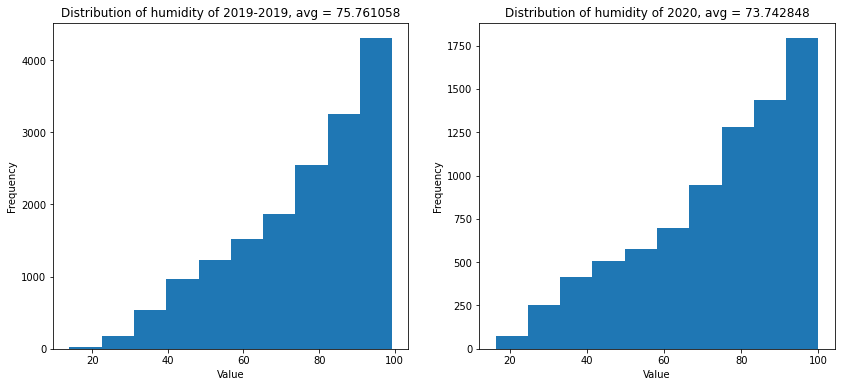

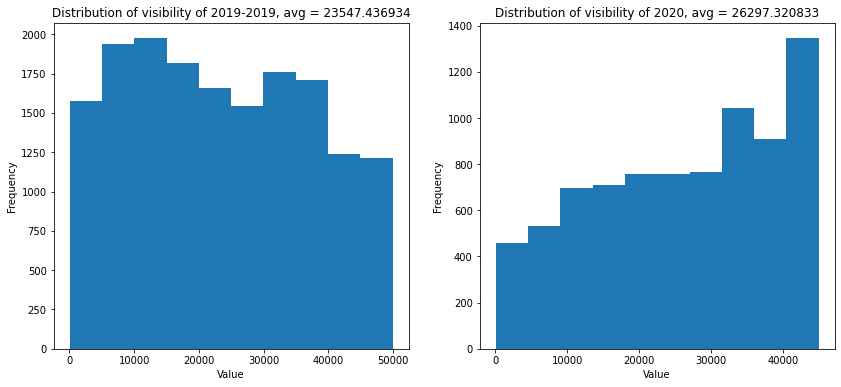

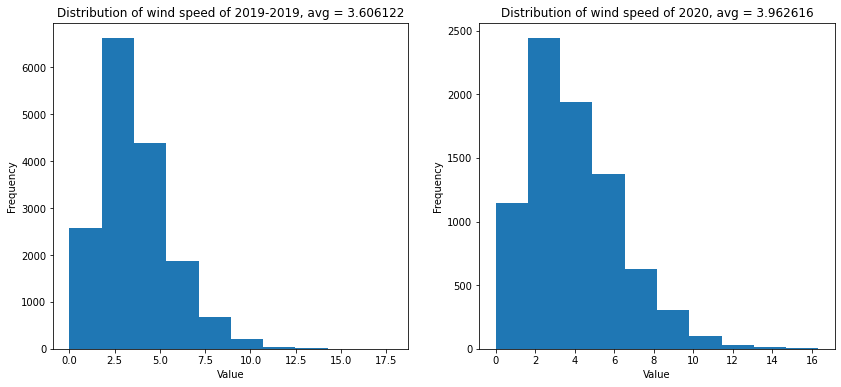

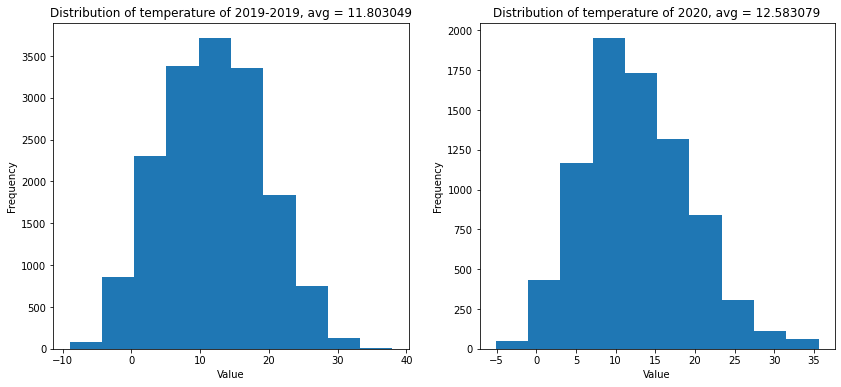

In [71]:
# TODO: Investigate changes
def plot_distribution(attr):
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    plt.hist(data[attr])
    plt.title('Distribution of %s of 2019-2019, avg = %2f' % (attr, np.mean(data[attr])))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.subplot(122)
    plt.hist(weather_20[attr])
    plt.title('Distribution of %s of 2020, avg = %2f' % (attr, np.mean(weather_20[attr])))
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    
attrs = ['clouds', 'air pressure', 'humidity', 'visibility', 'wind speed', 'temperature']
for attr in attrs:
    plot_distribution(attr)

In [72]:
#// BEGIN_TODO [Q17]
question_change = '''The difference between the distribution of attributes in 2017-2019 and 2020 leads to the
                     performance drop. Concretely, there are huge differences in visibility, and distinction
                     that cannot be ignored when it comes to the average of clouds and humidity. The model can
                     only adapt to the data with the same distribution as 2017-2019. Therefore, there must be a
                     performance decrease due to the dissimilar distribution of 2020'''
#// END_TODO [Q17]

### Question 18

To make your model robust to these kind of changes, you may want to re-train it on more appropriate data. Using all the data you have been provided so far, compose more suitable training and validation data sets, and assign them to `new_training_data` and `new_validation_data`, respectively. the Scikit-Learn library has some potentially useful functions for generating these data sets (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

In [73]:
energy_1719 = clean_format_energy(raw_energy)
energy_2020 = clean_format_energy(raw_energy_20)
weather_1719 = clean_format_weather(raw_weather)
weather_2020 = clean_format_weather(raw_weather_20)

new_energy = pd.concat([energy_1719, energy_2020])
new_weather = pd.concat([weather_1719, weather_2020])

new_data = pd.merge(new_energy, new_weather).dropna().reset_index(drop=True)
new_data.head()

,index,year,month,day,hour,total_consumption,total_solar_production,production,consumption,clouds,air pressure,humidity,visibility,wind speed,temperature
0,1,2017,1,1,0,13188.774,4147.1,0.0,0.475,3.0,1025.550000,99.0,275.500000,3.000000,-1.650000
1,2,2017,1,1,1,13189.207,4147.1,0.0,0.433,3.0,1024.650000,99.0,392.500000,3.166667,-1.416667
2,3,2017,1,1,2,13189.513,4147.1,0.0,0.306,3.0,1024.066667,99.0,332.333333,4.000000,-1.300000
3,4,2017,1,1,3,13189.779,4147.1,0.0,0.266,3.0,1023.166667,99.0,511.500000,3.333333,-1.216667
4,5,2017,1,1,4,13190.117,4147.1,0.0,0.338,3.0,1022.266667,99.0,1758.333333,3.333333,-1.216667


In [74]:
#// BEGIN_TODO [Q18]
new_training_data, new_validation_data = train_test_split(new_data, test_size=0.2, random_state=8848)
#// END_TODO [Q18]

### Predicting consumption

Besides solar production, we are also interested in predicting energy consumption. Being able to accurately predict the power bill may save us from any surprises in the future. The year 2020 has been rather different from most other years, to say the least. Now that you have the data for part of the year 2020, let's look into energy consumption anomalies that may be found here.

### Question 19

The energy consumption shows two dips in the data from 2020 due to the turning off of large electrical appliances. For each of the dips, fill in the start and end day when the decrease occurred in the variables `consumption_dip_1` and `consumption_dip_2` as a list of two dates each. Please use the YYYY-MM-DD format (e.g. `["2020-02-12", "2020-02-14"]`).

[25, 186]


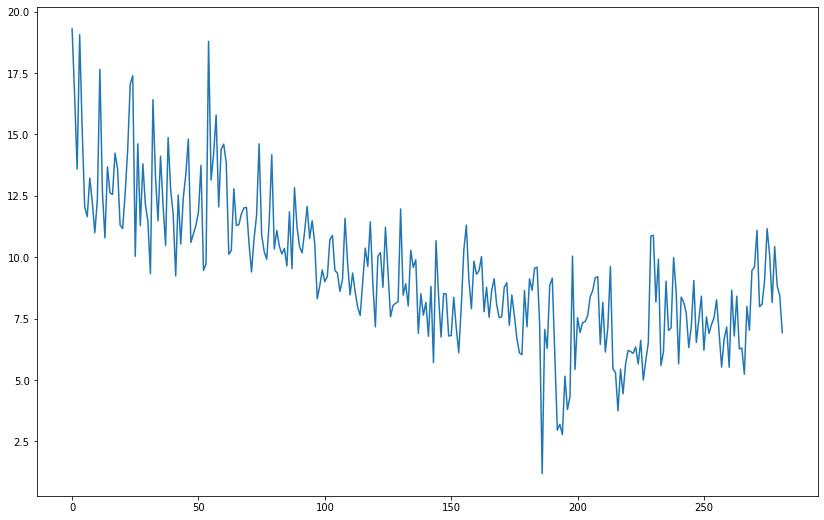

In [75]:
# plt.plot(new_data['consumption'], '.')
# plt.ylim([0, 0.02])
# # plt.show()
# # raw_energy_20[raw_energy_20['total_consumption'] < 20000]

# raw_energy_1720 = pd.concat([raw_energy, raw_energy_20])
# consumption_1720 = raw_energy_1720["total_consumption"] - raw_energy_1720["total_consumption"].shift(1)
# plt.plot(consumption_1720, '.')
# plt.ylim([0, 0.02])

comsumption_by_day = list(energy_2020.groupby(by=[energy_2020.day])['consumption'].agg(np.sum))
consumption_drop = [0]
for i in range(len(comsumption_by_day)-1):
    consumption_drop.append(comsumption_by_day[i] - comsumption_by_day[i+1])
# consumption_drop.sort()

import heapq

max_num_index_list = map(consumption_drop.index, heapq.nlargest(2, consumption_drop))
print(list(max_num_index_list))

plt.plot(comsumption_by_day, '-')
# plt.xlim([183, 188])

In [76]:
#// BEGIN_TODO [Q19]
consumption_dip_1 = ["2020-01-24", "2020-01-26"]
consumption_dip_2 = ["2020-07-03", "2020-07-05"]
#// END_TODO [Q19]

### Question 20

Consumption may depend on other factors than production, so we may need to reconsider the features we chose in question 12. Considering the new training target, which two features from question 12 are most promising for the prediction of energy consumption? Assign them to `question_consumption_features`.

mae: 0.1782624972949988


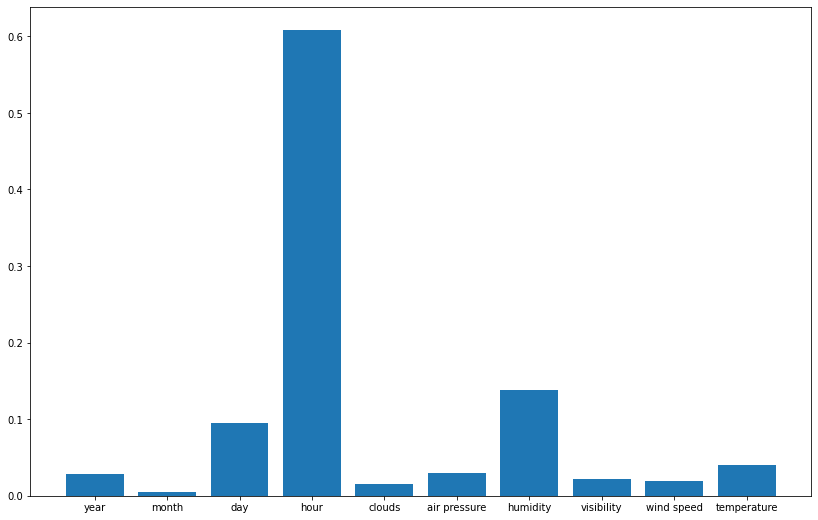

In [77]:
new_data.head()

feature = ["year", "month", "day", "hour", "clouds", "air pressure", "humidity", "visibility", "wind speed", "temperature"]
X = new_data[feature].values
y = new_data["consumption"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_tree = tree.DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=10, 
                                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                             max_features=None, random_state=None, max_leaf_nodes=None, 
                                             min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
regression_tree = regression_tree.fit(X_train, y_train)
y_pred = regression_tree.predict(X_test) 
print('mae:', mean_absolute_error(y_test, y_pred))
# summarize feature importance
importance = regression_tree.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], feature)
plt.show()

In [78]:
#// BEGIN_TODO [Q20]
question_consumption_features = ['hour', 'humidity']
#// END_TODO [Q20]

Train and evaluate your new model on the data from 2017 through 2019 (do not include the data from 2020) so you can predict the energy consumption.

In [79]:
# TODO: Train a new model to predict energy consumption

new_data_1719 = pd.merge(energy_1719, weather_1719).dropna().reset_index(drop=True)
new_data_1719.head()

feature = ["year", "month", "day", "hour", "clouds", "air pressure", "humidity", "visibility", "wind speed", "temperature"]
X = new_data_1719[feature].values
y = new_data_1719["consumption"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

consumption_regression_tree = tree.DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=10, 
                                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                             max_features=None, random_state=None, max_leaf_nodes=None, 
                                             min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
regression_tree = consumption_regression_tree.fit(X_train, y_train)
y_pred = consumption_regression_tree.predict(X_test) 
print('mae:', mean_absolute_error(y_test, y_pred))

mae: 0.20161226041984476


### Question 21

As in question 17, check this new model's performance when predicting the energy consumption for the data from 2020. Is there a shift taking place in the data underlying the model? If so, what kind of shift do you think it is? Assign the integer corresponding to the correct answer to `question_consumption_shift`.

1. Sample covariate shift
2. Source component shift

In [80]:
new_data_2020 = pd.merge(energy_2020, weather_2020).dropna().reset_index(drop=True)
new_data_2020.head()

X_2020 = new_data_2020[feature].values
prediction_comsumption_2020 = consumption_regression_tree.predict(X_2020)
print('mae:', mean_absolute_error(new_data_2020['consumption'], prediction_comsumption_2020))

mae: 0.18428758806783171


We can see that the `mae` changes from 0.2027 (2017-2019) to 0.1837 (2020). The reason has been dicovered in Question 17. The distribution of the training data in 2017-2019 is different from the one in 2020.

In [81]:
#// BEGIN_TODO [Q21]
question_consumption_shift = 1
#// END_TODO [Q21]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [82]:
#// BEGIN_TODO [Feedback_1]
feedback_time = 50
#// END_TODO [Feedback_1]

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 1 - 10, with 1 being very easy.

In [83]:
#// BEGIN_TODO [Feedback_2]
feedback_difficulty = 8
#// END_TODO [Feedback_2]

### Did you take the course Foundations of Data Mining?

Assign a boolean value to `feedback_foundations` (True or False).

In [84]:
#// BEGIN_TODO [Feedback_3]
feedback_foundations = False
#// END_TODO [Feedback_3]

### Did you do any other Machine Learning-related coursework (university/workshop/online/etc)

Assign an answer to `feedback_other`, describing any other coursework done.

In [85]:
#// BEGIN_TODO [Feedback_4]
feedback_other = 'no'
#// END_TODO [Feedback_4]

### (Optional) Which parts of the assignment did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_TODO [Feedback_5]
#// END_TODO [Feedback_5]

### (Optional) Which parts of the assignment could be improved?

Assign a string to `feedback_improve`.

In [ ]:
#// BEGIN_TODO [Feedback_6]
#// END_TODO [Feedback_6]